In [68]:
from FyeldGenerator import generate_field
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import elasticdeform
import random
from mpl_toolkits.axes_grid1 import ImageGrid
from moseq2_detectron_extract.model.augmentations import RandomFieldNoiseAugmentation


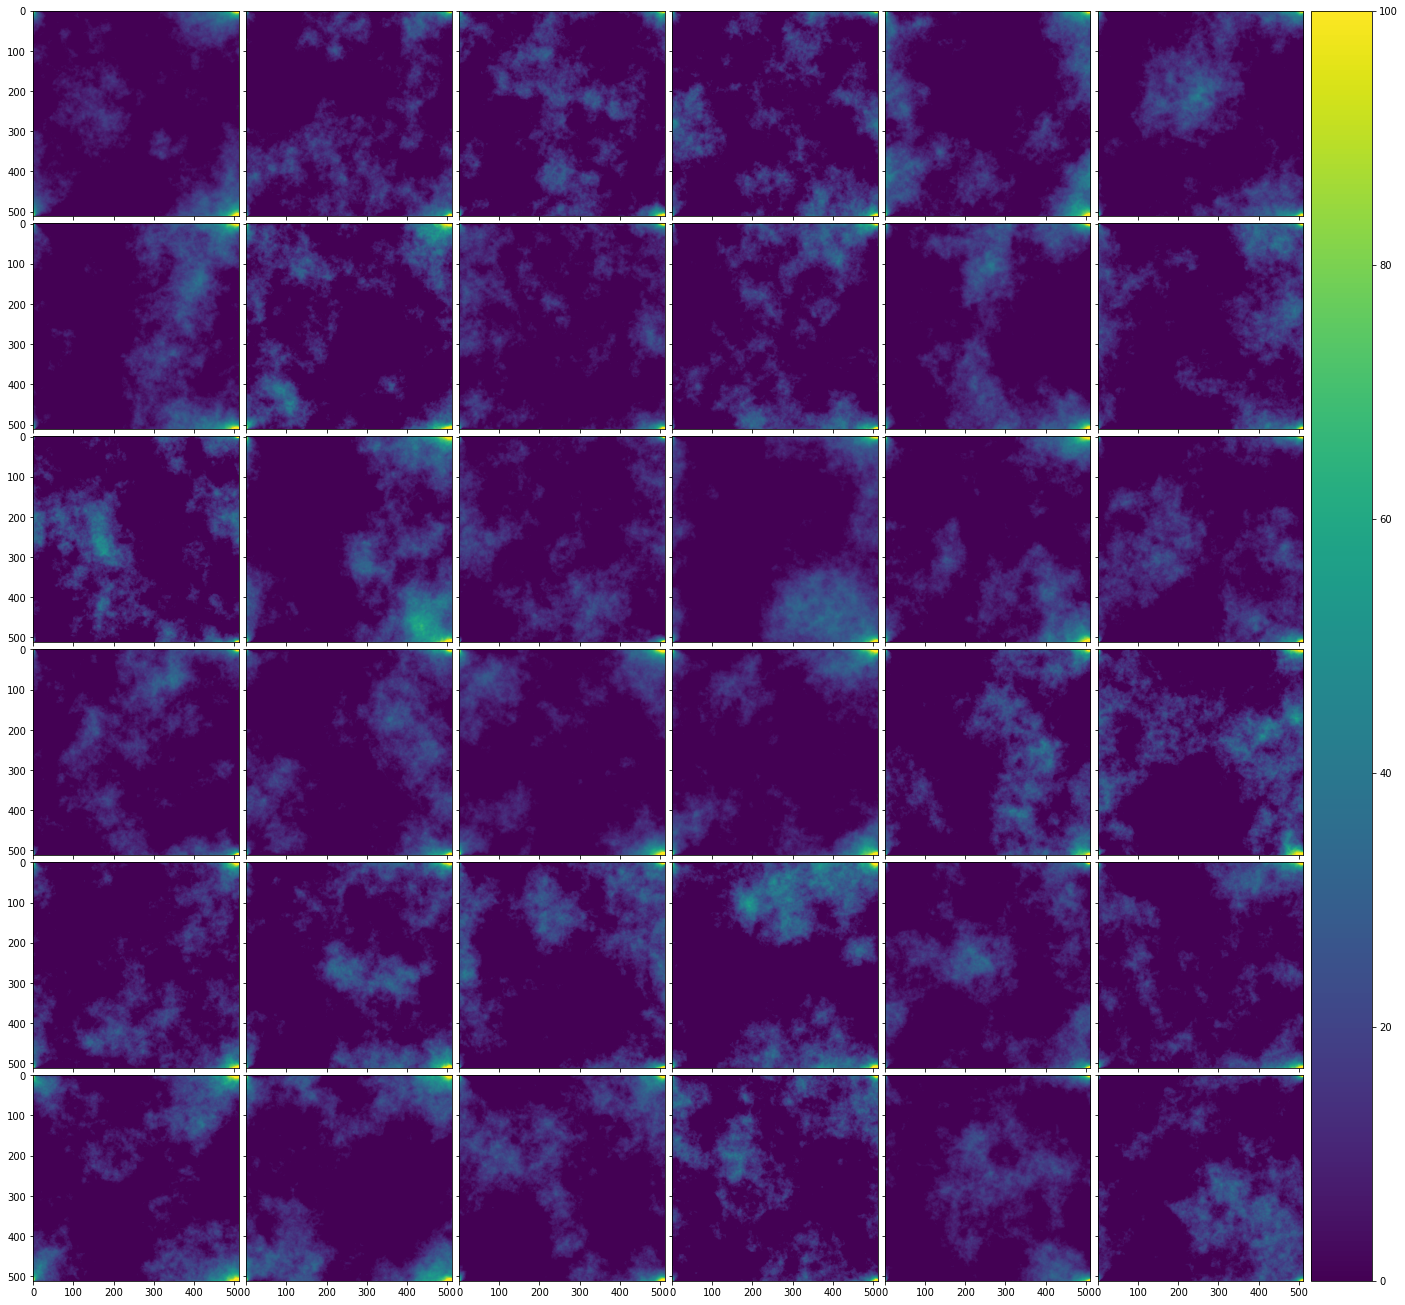

In [85]:
gen = RandomFieldNoiseAugmentation(mu=50, std_limit=(50.0, 100.0), power=(3.0, 3.0), always_apply=True)

vmin=0
vmax=100

fig = plt.figure(figsize=(24, 24))
grid = ImageGrid(fig, 111, nrows_ncols=(6, 6), cbar_mode='single', axes_pad=0.1, share_all=True)

for ax in grid:
    im = ax.imshow(gen.get_field((512, 512)), vmin=vmin, vmax=vmax)
grid.cbar_axes[0].colorbar(im)


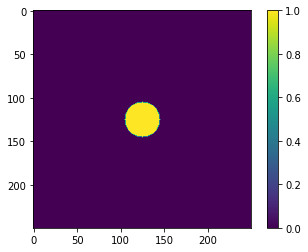

In [13]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))

    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

plt.imshow(create_circular_mask(250, 250, radius=20))
plt.colorbar()

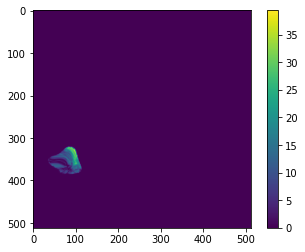

In [78]:
def generate_particle(size=(512, 512), radius_range=(5, 50), points_range=(3, 20)):

    radius = random.uniform(radius_range[0], radius_range[1])
    points = int(random.uniform(points_range[0], points_range[1]))
    center = (int(random.uniform(0, size[0])), int(random.uniform(0, size[1])))

    gen = RandomFieldNoiseAugmentation(mu=100, std_limit=(100.0, 100.0), power=(3.0, 3.0), always_apply=True)
    particle = gen.get_field(size)

    mask = create_circular_mask(*size, center=center, radius=radius)
    particle[~mask] = 0
    particle = elasticdeform.deform_random_grid(particle, sigma=radius // 2, points=points)
    particle[particle < 0] *= -1.0

    return particle

im = plt.imshow(generate_particle())
plt.colorbar(im)

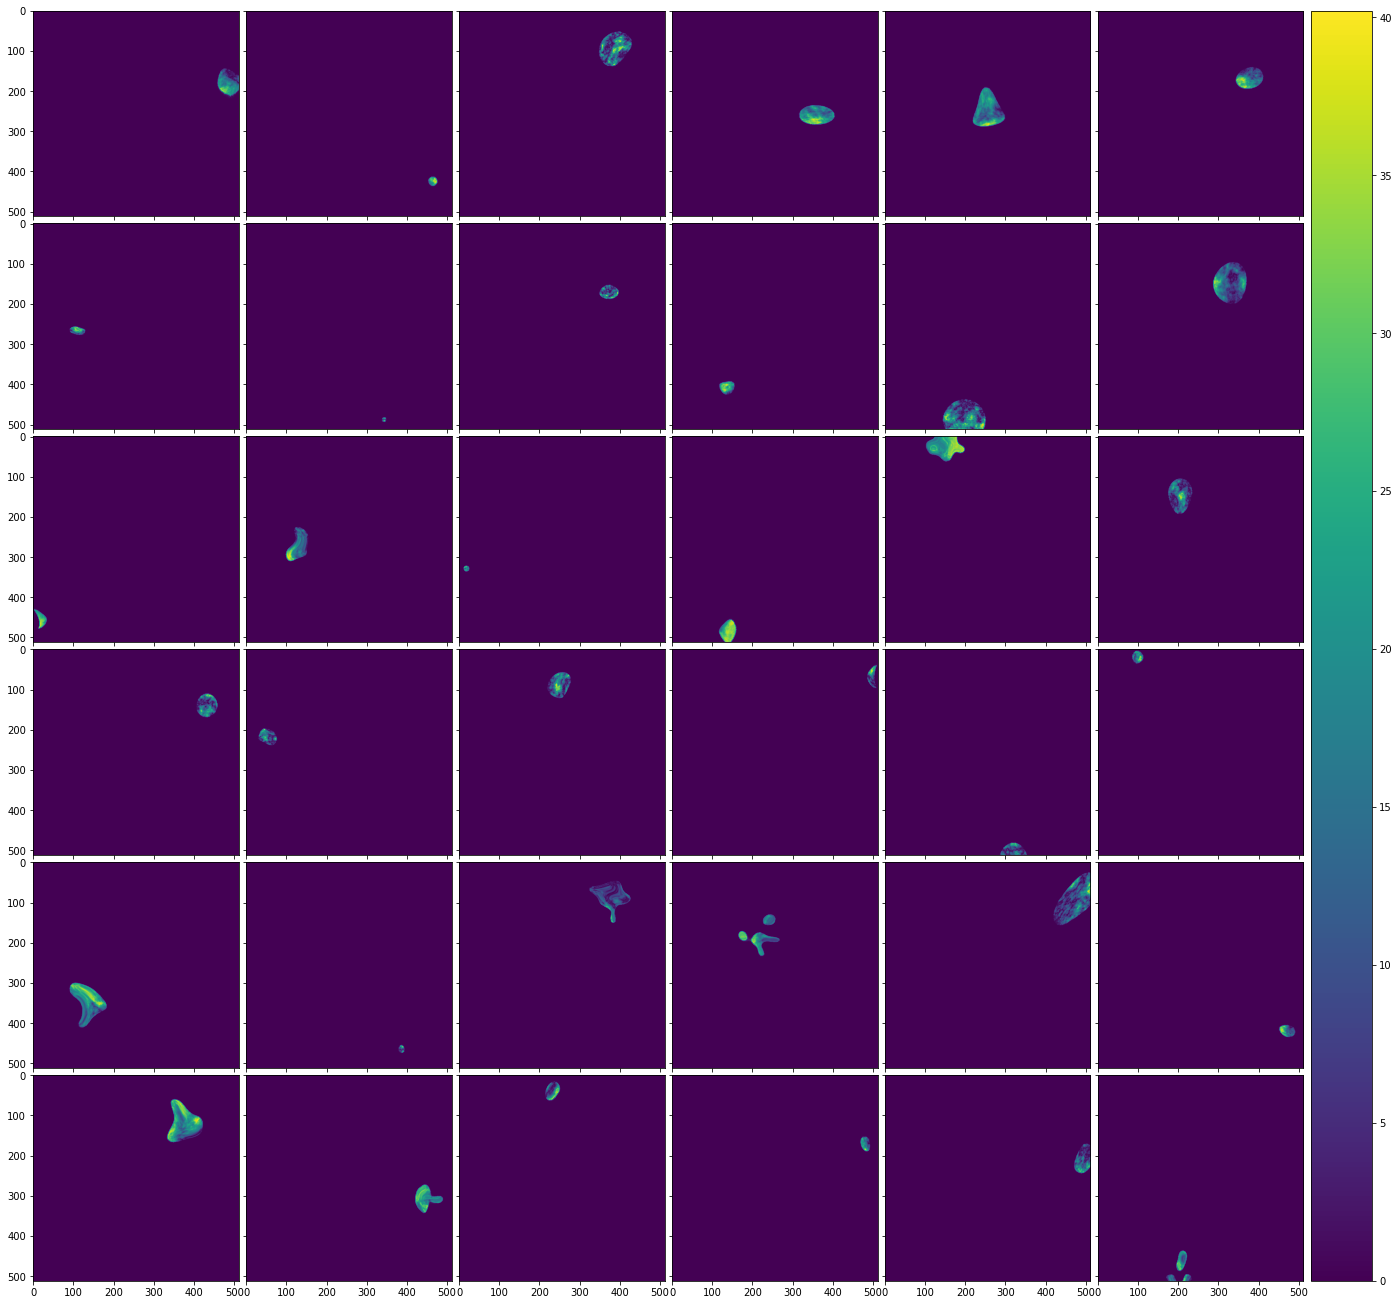

In [79]:
vmin = 0
vmax = None

fig = plt.figure(figsize=(24, 24))
grid = ImageGrid(fig, 111, nrows_ncols=(6, 6), cbar_mode='single', axes_pad=0.1, share_all=True,)

for ax in grid:
    im = ax.imshow(generate_particle(), vmin=vmin, vmax=vmax)
grid.cbar_axes[0].colorbar(im)